# Wine Quality Prediction Model
This notebook trains and evaluates multiple machine learning models to predict wine quality.

In [8]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Explore Data

In [9]:
# Load the wine quality dataset (Red Wine)
# You can download from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Basic information
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599

In [11]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 2. Data Preprocessing

In [12]:
# Check correlation with quality
correlation = df.corr()['quality'].sort_values(ascending=False)
print("Correlation with quality:")
print(correlation)

Correlation with quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


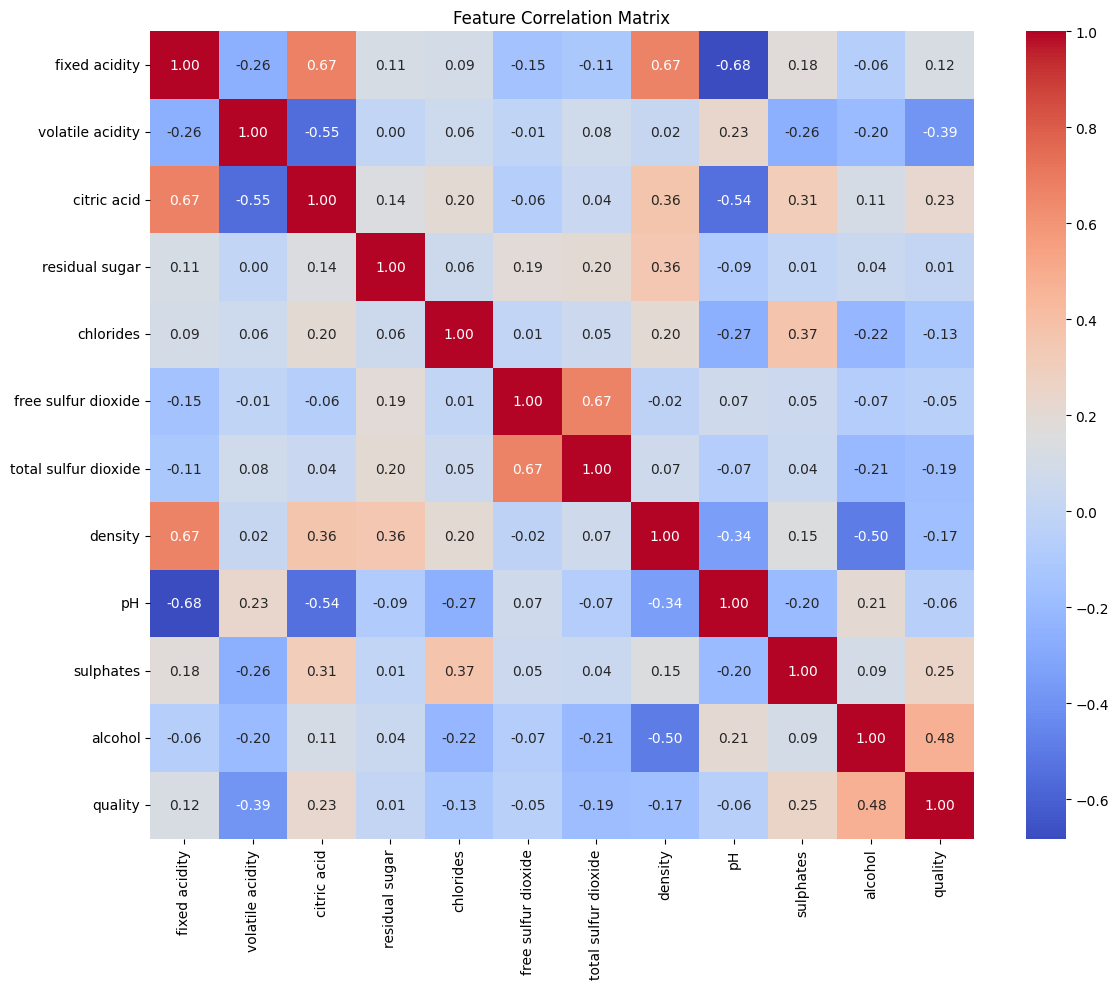

In [13]:
# Visualize correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [14]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1599, 11)
Target shape: (1599,)


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1279
Test set size: 320


## 3. Train Multiple Models

In [16]:
# Dictionary to store models and their performance
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

In [17]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae
    })
    
    print(f"\n{name}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  Test MAE: {test_mae:.4f}")


Linear Regression:
  Train R²: 0.3480
  Test R²: 0.4032
  Train RMSE: 0.6513
  Test RMSE: 0.6245
  Test MAE: 0.5035

Ridge Regression:
  Train R²: 0.3469
  Test R²: 0.3987
  Train RMSE: 0.6518
  Test RMSE: 0.6269
  Test MAE: 0.5058

Lasso Regression:
  Train R²: 0.2365
  Test R²: 0.2369
  Train RMSE: 0.7048
  Test RMSE: 0.7062
  Test MAE: 0.5673

Decision Tree:
  Train R²: 1.0000
  Test R²: 0.0723
  Train RMSE: 0.0000
  Test RMSE: 0.7786
  Test MAE: 0.4625

Random Forest:
  Train R²: 0.9266
  Test R²: 0.5390
  Train RMSE: 0.2186
  Test RMSE: 0.5489
  Test MAE: 0.4224

Gradient Boosting:
  Train R²: 0.6173
  Test R²: 0.4456
  Train RMSE: 0.4990
  Test RMSE: 0.6019
  Test MAE: 0.4849


In [18]:
# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test R²', ascending=False)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
               Model  Train R²   Test R²  Train RMSE  Test RMSE  Test MAE
4      Random Forest  0.926567  0.539043    0.218575   0.548852  0.422438
5  Gradient Boosting  0.617318  0.445552    0.498969   0.601943  0.484936
0  Linear Regression  0.347993  0.403180    0.651300   0.624520  0.503530
1   Ridge Regression  0.346942  0.398706    0.651824   0.626856  0.505788
2   Lasso Regression  0.236524  0.236923    0.704778   0.706169  0.567250
3      Decision Tree  1.000000  0.072311    0.000000   0.778621  0.462500


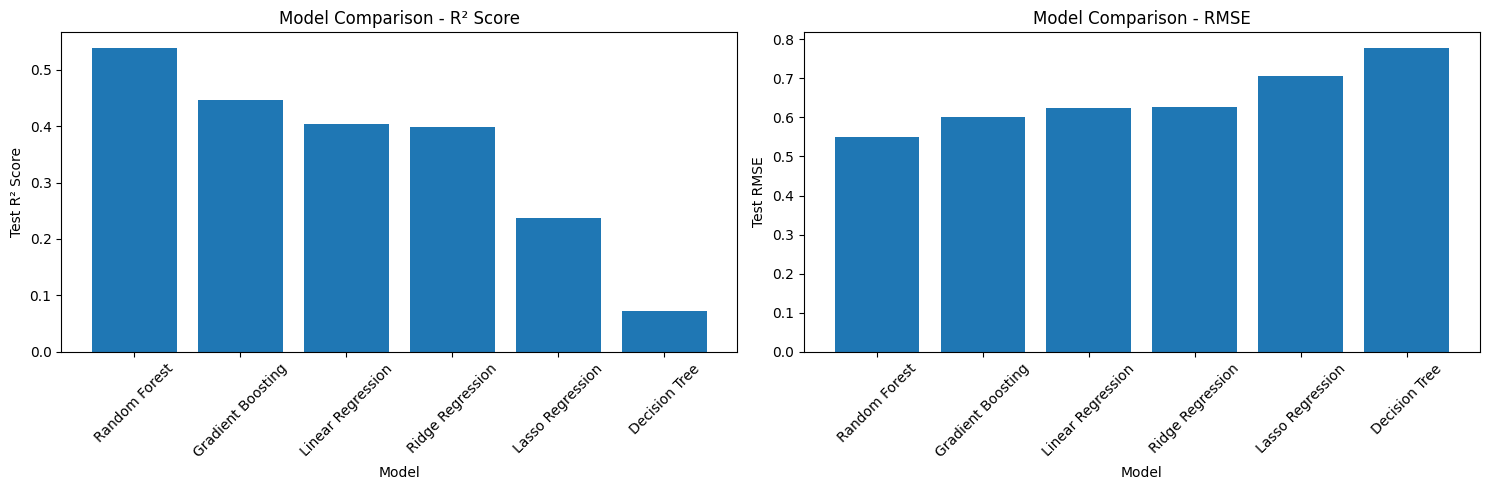

In [19]:
# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R² Score comparison
axes[0].bar(results_df['Model'], results_df['Test R²'])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Test R² Score')
axes[0].set_title('Model Comparison - R² Score')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[1].bar(results_df['Model'], results_df['Test RMSE'])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Test RMSE')
axes[1].set_title('Model Comparison - RMSE')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Select Best Model and Save

In [20]:
# Get the best model based on Test R²
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Test R²: {results_df.iloc[0]['Test R²']:.4f}")
print(f"Test RMSE: {results_df.iloc[0]['Test RMSE']:.4f}")


Best Model: Random Forest
Test R²: 0.5390
Test RMSE: 0.5489


In [21]:
# Save the best model
with open('wine_quality_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("\nModel saved as 'wine_quality_model.pkl'")


Model saved as 'wine_quality_model.pkl'


## 5. Feature Importance (if applicable)

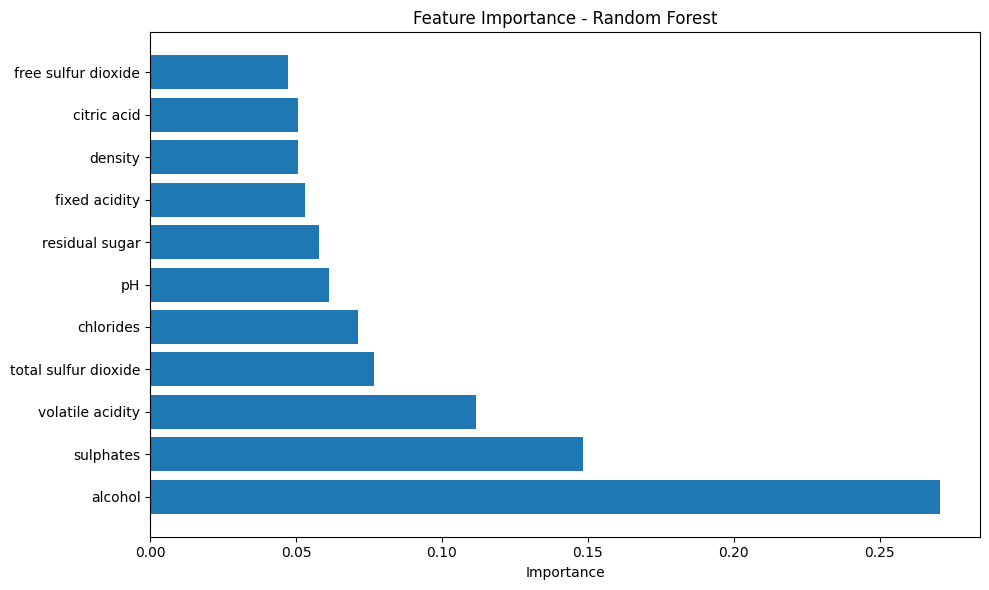


Feature Importance:
                 feature  importance
10               alcohol    0.270868
9              sulphates    0.148406
1       volatile acidity    0.111547
6   total sulfur dioxide    0.076786
4              chlorides    0.071132
8                     pH    0.061418
3         residual sugar    0.057892
0          fixed acidity    0.053186
7                density    0.050816
2            citric acid    0.050752
5    free sulfur dioxide    0.047197


In [22]:
# Show feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance:")
    print(feature_importance)

## 6. Test Prediction

In [23]:
# Test a sample prediction
sample_data = X_test.iloc[0:1]
prediction = best_model.predict(sample_data)
actual = y_test.iloc[0]

print("\nSample Prediction Test:")
print("Input features:")
print(sample_data)
print(f"\nPredicted Quality: {prediction[0]:.2f}")
print(f"Actual Quality: {actual}")


Sample Prediction Test:
Input features:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803            7.7              0.56         0.08             2.5      0.114   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
803                 14.0                  46.0   0.9971  3.24       0.66   

     alcohol  
803      9.6  

Predicted Quality: 5.30
Actual Quality: 6
